In [1]:
import scipy.io as sio
import scipy.io.wavfile as swv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
def clip_data_smooth(y, eps = 1e-3):
    """
    creates a version of y that should look approximately continuous/smooth if looped back-to-back with itself.
    for making a signal that should turn into a nice .wav file without a click
    
    INPUT:
        y = one-dimensional array
        eps = tolerance with which to match value + derivative
        
    OUTPUT:
        yloop = y with initial portion trimmed off so as to be nice
    """
    ytarget = y[-1]
    yptarget = y[-1] - y[-2]
    yp = y[1:] - y[:-1]
    i = min(np.where(np.abs(y[1:] - ytarget) + np.abs(yp - yptarget) < eps)[0])
    return y[i:]

def get_weighted_sum(weights, z):
    return np.dot( np.arange(15)/15., z.astype(np.float32) )

In [3]:
directory = "data/"
print(os.listdir(directory))
print(len(os.listdir(directory)))

['K_in_9.1837_K_out_0.5102.mat', 'K_in_5.1020_K_out_0.5102.mat']
2


In [8]:
file_num = 1 # remember to start counting at 0
file_name = os.listdir(directory)[file_num]

# open the mat file
M = sio.loadmat(directory + file_name, squeeze_me = True)
z = M['z']

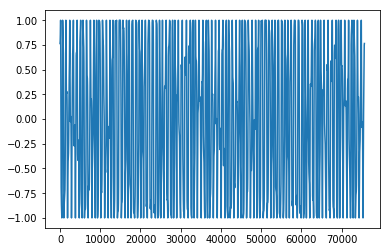

In [9]:
single_oscillator_data_reals = z[1,:].real
single_oscillator_data_reals = clip_data_smooth(single_oscillator_data_reals)
single_oscillator_data_reals_copied = np.hstack([ single_oscillator_data_reals for i in range(10) ])

plt.plot(single_oscillator_data_reals)
swv.write('single_oscillator_file' + str(file_num) + '.wav', 44100*4, single_oscillator_data_reals_copied)

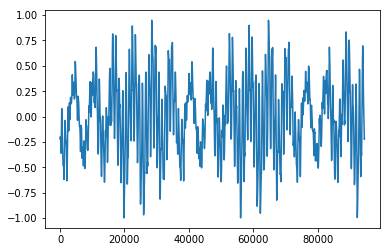

In [10]:
all_oscillator_data_reals = np.sum(z.real,axis=0)
all_oscillator_data_reals /= max(abs(all_oscillator_data_reals))
all_oscillator_data_reals = clip_data_smooth(all_oscillator_data_reals)
plt.plot(all_oscillator_data_reals)

all_oscillator_data_reals_copied = np.hstack([ all_oscillator_data_reals for i in range(10) ])
# Write the data to 'newname.wav'
swv.write('all_oscillator_file' + str(file_num) + '.wav', 44100*4, all_oscillator_data_reals_copied)

/Users/dmitron/.local/share/virtualenvs/OscillatorSonification-WGHsqb-U/lib/python2.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


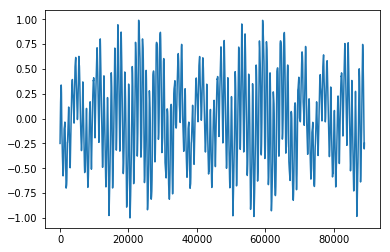

In [11]:
all_oscillator_data_reals = get_weighted_sum(np.arange(15)/15.,z)
all_oscillator_data_reals /= max(abs(all_oscillator_data_reals))
all_oscillator_data_reals = clip_data_smooth(all_oscillator_data_reals)
plt.plot(all_oscillator_data_reals)

all_oscillator_data_reals_copied = np.hstack([ all_oscillator_data_reals for i in range(10) ])
# Write the data to 'newname.wav'
swv.write('all_oscillator_file_reweighted' + str(file_num) + '.wav', 44100*4, all_oscillator_data_reals_copied)